#### Read the data

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
df.head()

,customer_id,event,time,offer-completed,offer-received,offer-viewed,transaction,offer_id,amount,gender,...,income,reward,difficulty,duration,offer_type,email,mobile,social,web,event_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer-received,0,0,1,0,0,0,NaN,F,...,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0,0
1,78afa995795e4d85b5d9ceeca43f5fef,offer-viewed,6,0,0,1,0,0,NaN,F,...,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0,1
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,0,0,0,1,1,19.89,F,...,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,78afa995795e4d85b5d9ceeca43f5fef,offer-completed,132,1,0,0,0,0,NaN,F,...,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0,3
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,0,0,0,1,1,17.78,F,...,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [4]:
df.columns

Index(['customer_id', 'event', 'time', 'offer-completed', 'offer-received',
       'offer-viewed', 'transaction', 'offer_id', 'amount', 'gender', 'age',
       'became_member_on', 'income', 'reward', 'difficulty', 'duration',
       'offer_type', 'email', 'mobile', 'social', 'web', 'event_id'],
      dtype='object')

#### Data visualization

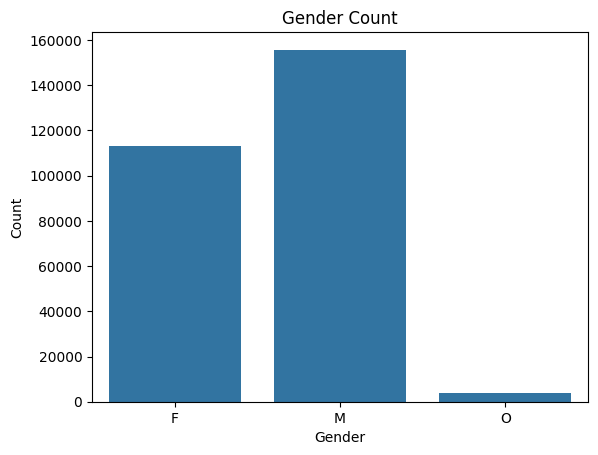

In [43]:
# Gender Visualization
sns.countplot(data=df, x='gender')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count')

plt.show()

- The F and M sexes are the most dominant. A small number have O gender. Among them, M gender has the largest number.
- Males are more than 50% of all the users. Over 150,000 of the Starbuck profiles collected is males while about 110,000 Starbuck profiles is females. And a few customers identified as Others.

In [6]:
df.gender.value_counts()

gender
M    155690
F    113101
O      3971
Name: count, dtype: int64

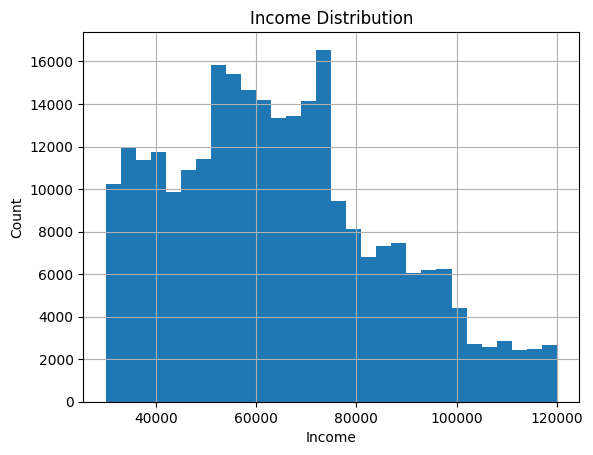

In [7]:
# Income Visualization
df.income.hist(bins = 30)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution');

Income is concentrated around $50,000 - $70,000. Large amount of income (> $110,000) accounts for a small amount.

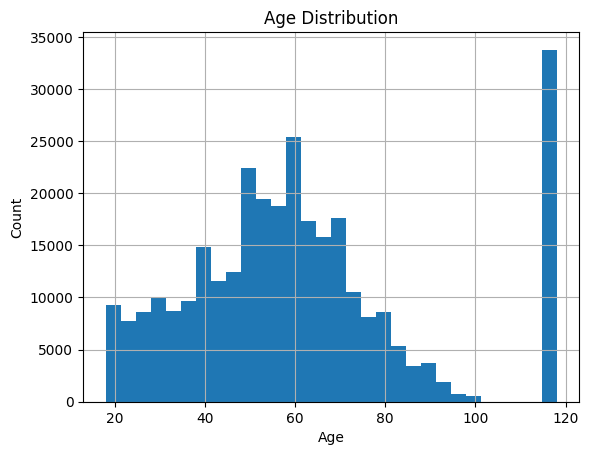

In [8]:
# Age Visualization
df.age.hist(bins = 30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution');

We can see that there are outliers in the `age` data. That's a number of people whose age is close to 120. The average age is concentrated around 50-70 years old.

#### Obser offer_type

In [9]:
# Check the offer_type
offer_received = df[df['offer-received'] == 1].offer_type.value_counts()
offer_received

offer_type
discount         30543
bogo             30499
informational    15235
Name: count, dtype: int64

In [10]:
offer_viewed = df[df['offer-viewed'] == 1].offer_type.value_counts()
offer_viewed

offer_type
bogo             25449
discount         21445
informational    10831
Name: count, dtype: int64

In [11]:
offer_completed = df[df['offer-completed'] == 1].offer_type.value_counts()
offer_completed

offer_type
discount    17910
bogo        15669
Name: count, dtype: int64

In [33]:
def plot_offer_analysis(df):
    """
    Plots the analysis of offers received, viewed, and completed.

    Args:
        df (pandas.DataFrame): The input DataFrame containing offer data.

    Returns:
        None
    """
    # create subplot
    fig = make_subplots(rows=1, cols=3, subplot_titles=("Offer received with Offer Type",
                                                        "Offer viewed with Offer Type",
                                                        "Offer completed with Offer Type"))

    # calculate offer_received
    offer_received = df[df['offer-received'] == 1].offer_type.value_counts()

    # visualize for Offer received
    fig.add_trace(go.Bar(x=offer_received.index, y=offer_received.values, name='offer-received'),
                  row=1, col=1)

    # calculate offer_viewed
    offer_viewed = df[df['offer-viewed'] == 1].offer_type.value_counts()

    # Visualize Offer viewed
    fig.add_trace(go.Bar(x=offer_viewed.index, y=offer_viewed.values, name='offer-viewed'),
                  row=1, col=2)

    # calculate offer_completed
    offer_completed = df[df['offer-completed'] == 1].offer_type.value_counts()

    # Visualize for Offer completed
    fig.add_trace(go.Bar(x=offer_completed.index, y=offer_completed.values, name='offer-completed'),
                  row=1, col=3)

    # layout
    fig.update_layout(height=500, width=1000, title_text="Offer Analysis")

    # Show
    fig.show()

In [34]:
plot_offer_analysis(df)

In [15]:
# caculate the percentage:
offer_viewed_bogo_percentage = offer_viewed[0]/offer_received[1]*100
offer_viewed_bogo_percentage

C:\Users\HungNM81\AppData\Local\Temp\ipykernel_464\1758340808.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



83.44208006819895

The percentage of `Bogo` offer viewer is 83.44% (30499 users received the offer and 25449 viewed it)

In [16]:
# caculate the percentage:
offer_completed_bogo_percentage = offer_completed[1]/offer_received[1]*100
offer_completed_bogo_percentage

C:\Users\HungNM81\AppData\Local\Temp\ipykernel_464\1637454670.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



51.375454932948614

The percentage of `Bogo` offer completed is 51.37% (30499 users received the offer and 15699 completed it)

In [17]:
# caculate the percentage for discount offer
offer_viewed_discount_percentage = offer_viewed[1]/offer_received[0]*100
offer_viewed_discount_percentage

C:\Users\HungNM81\AppData\Local\Temp\ipykernel_464\3104690624.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



70.21248731296859

The percentage of `Discount` offer viewer is 70.21% (30543 users received the offer and 21445 viewed it)

In [18]:
# caculate the percentage for discount offer
offer_completed_discount_percentage = offer_completed[0]/offer_received[0]*100
offer_completed_discount_percentage

C:\Users\HungNM81\AppData\Local\Temp\ipykernel_464\2514319138.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



58.63864060504862

The percentage of `Discount` offer completed is 58.64% (30543 users received the offer and 17910 completed it)

#### Obser offer_id

In [19]:
offer_received_id = df[df['offer-received'] == 1].offer_id.value_counts()
offer_received_id

offer_id
0     7677
5     7668
3     7658
10    7646
7     7632
2     7618
6     7617
8     7597
9     7593
4     7571
Name: count, dtype: int64

In [20]:
offer_viewed_id = df[df['offer-viewed'] == 1].offer_id.value_counts()
offer_viewed_id

offer_id
10    7337
8     7327
9     7298
4     7264
3     6716
2     6687
0     4171
6     4144
7     4118
5     2663
Name: count, dtype: int64

In [21]:
offer_completed_id = df[df['offer-completed'] == 1].offer_id.value_counts()
offer_completed_id

offer_id
8     5317
10    5156
0     4354
4     4296
7     4017
3     3688
5     3420
9     3331
Name: count, dtype: int64

In [35]:
def plot_offer_id_analysis(offer_received_id, offer_viewed_id, offer_completed_id):
    """
    Plots the analysis of offers received, viewed, and completed based on offer IDs.

    Args:
        offer_received_id (pandas.Series): The offer IDs for offers received.
        offer_viewed_id (pandas.Series): The offer IDs for offers viewed.
        offer_completed_id (pandas.Series): The offer IDs for offers completed.

    Returns:
        None
    """
    # create subplot
    fig = make_subplots(rows=1, cols=3, subplot_titles=("Offer received with Offer ID",
                                                        "Offer viewed with Offer ID",
                                                        "Offer completed with Offer ID"))

    # visualize for Offer received
    fig.add_trace(go.Bar(x=offer_received_id.index, y=offer_received_id.values, name='offer-received'),
                  row=1, col=1)

    # Visualize Offer viewed
    fig.add_trace(go.Bar(x=offer_viewed_id.index, y=offer_viewed_id.values, name='offer-viewed'),
                  row=1, col=2)

    # Visualize for Offer completed
    fig.add_trace(go.Bar(x=offer_completed_id.index, y=offer_completed_id.values, name='offer-completed'),
                  row=1, col=3)

    # layout
    fig.update_layout(height=500, width=1000, title_text="Offer ID Analysis")

    # Show
    fig.show()

In [36]:
plot_offer_id_analysis(offer_received_id, offer_viewed_id, offer_completed_id)

- We notice that the number of `offer_received` is quite uniform compared to `offer_id`
- The highest number of `offer_viewed` is with `offer_id`: 4, 8, 9, 10. The lowest is `offer_id`: 0, 5, 6, 7
- The highest number of `offer_completed` with `offer_id`: 8, 10. Lower is the `offer_id`: 3, 5, 7, 9

#### Offer received by user

In [37]:
def plot_bogo_offer_received(df):
    """
    Plots the histogram of BOGO offers received by users.

    Args:
        df (pandas.DataFrame): The input DataFrame containing offer data.

    Returns:
        None
    """
    filtered_df = df[df['offer_type'] == 'bogo']
    grouped_df = filtered_df.groupby('customer_id')['offer-received'].count().reset_index()

    fig = px.histogram(grouped_df, x='offer-received')

    fig.update_layout(
        title='BOGO Offer Received by User',
    )
    fig.show()

In [38]:
plot_bogo_offer_received(df)

- the ratio of 2 - 6 bogo offer is highest.
- highest is 3 offer-received with 2892 users

In [39]:
def plot_informational_offer_received(df):
    """
    Plots the histogram of informational offers received by users.

    Args:
        df (pandas.DataFrame): The input DataFrame containing offer data.

    Returns:
        None
    """
    filtered_df = df[df['offer_type'] == 'informational']
    grouped_df = filtered_df.groupby('customer_id')['offer-received'].count().reset_index()

    fig = px.histogram(grouped_df, x='offer-received')

    fig.update_layout(
        title='Informational Offer Received by User',
    )
    fig.show()

In [40]:
plot_informational_offer_received(df)

- the ratio of 0 - 2 infomational offer received is highest.
- highest is 2 offer-received with 5131 users

In [41]:
def plot_discount_offer_completed(df):
    """
    Plots the histogram of discount offers completed by users.

    Args:
        df (pandas.DataFrame): The input DataFrame containing offer data.

    Returns:
        None
    """
    filtered_df = df[df['offer_type'] == 'discount']
    grouped_df = filtered_df.groupby('customer_id')['offer-completed'].count().reset_index()

    fig = px.histogram(grouped_df, x='offer-completed')

    fig.update_layout(
        title='Discount Offer Completed by User',
    )
    fig.show()

In [42]:
plot_discount_offer_completed(df)

- the ratio of 2 - 6 discount offer completed is highest.
- highest is 2 offer-completed with 3188 users